### Heart Disease Classification

We will be utilising the heart disease classification dataset to predict which patients are most likely to suffer from a heart disease in the near future using the features given.

### Attribute Information (Input Features)
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. ca- Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.
13. thal : Displays the thalassemia : 1,3 = normal 6 = fixed defect 7 = reversible defect: no proper blood movement when excercising

### Target :
14. target : Displays whether the individual is suffering from heart disease or not : 1 = yes 0 = no

### Import the libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
cd

C:\Users\hp


### Read the Dataset first

In [12]:
df=pd.read_csv(r"C:\Users\hp\heart.csv")

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Let's check the data

In [14]:
count=df['target'].value_counts()

In [15]:
count

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

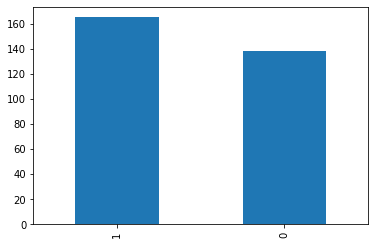

In [18]:
count.plot(kind="bar")

In [19]:
NoDisease=len(df[df.target==0])
Disease=len(df[df.target==1])

print("No Disease:"+str(NoDisease))
print("Disease:" +str(Disease))

No Disease:138
Disease:165


#### We infer from the dataset that
#### 1. 138 patients don't have heart disease.
#### 2. 165 patients have heart disease.

Text(0.5, 0, 'sex(0=female, 1 = male)')

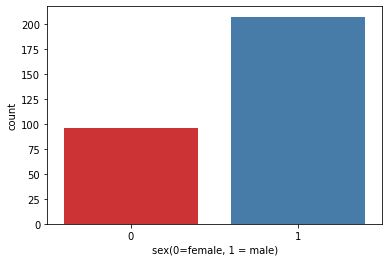

In [21]:
sns.countplot(x="sex",data=df,palette="Set1")
plt.xlabel("sex(0=female, 1 = male)")

In [22]:
count=df['sex'].value_counts()
count

1    207
0     96
Name: sex, dtype: int64

### We infer from the above plot that
1. 96 are female patients
2. 207 are mail patiemts

### Let's apply Machine learning techniques.

### Let's try Logistic Regression first !!

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [24]:
x=df.iloc[:,:-1].values
y=df.iloc[:,13].values

In [25]:
lr=LogisticRegression()

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [27]:
lr.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Get Predictions

In [28]:
y_pred=lr.predict(x_test)

In [29]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

### Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [31]:
cm

array([[22,  5],
       [ 4, 30]], dtype=int64)

In [32]:
accuracy=(22+30)/(22+5+4+30)

In [33]:
accuracy*100

85.24590163934425

### Let's try Decision Tree now !!

In [34]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
print("Decision Tree Test Accuracy {:.2f}%".format(dtc.score(x_test, y_test)*100))

Decision Tree Test Accuracy 78.69%


### Let's try Random Forest now !!

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(rf.score(x_test,y_test)*100))

Random Forest Algorithm Accuracy Score : 85.25%


##### So we will be using Random Forest algorithm from the above algorithms.